In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# The astroquery package

The virtual observatory (VO) is a collection of interoperating data archives and software tools which utilize the internet to form a scientific research environment in which astronomical research programs can be conducted.

* data : images, spectra, tables
* tools to visualize and analyze the data

VO data can be accessed from a set of web interfaces. This notebook will show how to get data from two of them:
* SkyView: *"a Virtual Observatory on the Net generating images of any part of the sky at wavelengths in all regimes from Radio to Gamma-Ray."*<br/>
    https://skyview.gsfc.nasa.gov/

* Vizier: *"the most complete library of published astronomical catalogues and data tables available on line organized in a self-documented databas"*<br/>
    http://vizier.u-strasbg.fr/


## astroquery
Astroquery is a set of tools for querying astronomical web forms and databases.
The list of available services is [here](https://astroquery.readthedocs.io/en/latest/#available-services).

This notebook show a few examples using:
* [Skyview Queries (`astroquery.skyview`)](https://astroquery.readthedocs.io/en/latest/skyview/skyview.html)
* [VizieR Queries (`astroquery.vizier`)](https://astroquery.readthedocs.io/en/latest/vizier/vizier.html)

https://astroquery.readthedocs.io/en/latest/


# Retrieve images from SkyView
With SkyView it is possible to get images from a number of imaging surveys, for example:

* Digitized Sky Survey (DSS): optical all-sky survey
* Two Micron All Sky Survey (2MASS): near-IR (J, H, and K band) all-sky survey
* Sloan Digitized Sky Survey (SDSS): optical (u, g, ,r, i, z band) survey of the Northern Hemisphere

In [2]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from astroquery.skyview import SkyView

images=SkyView.get_images(position="M51",
                          pixels=(600,600),
                          radius=15*u.arcmin,
                          survey=['2MASS-J', 'SDSSg'])

In [3]:
# you have a list of images (HDUs, the object that is created when you read a FITS file)
print( type(images) )
print( type(images[0]) )


<class 'list'>
<class 'astropy.io.fits.hdu.hdulist.HDUList'>


In [4]:
hdus1,hdus2=images

hdus1.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     151   (600, 600)   float32   


Text(0.5,1,'M51 - SDSS g')

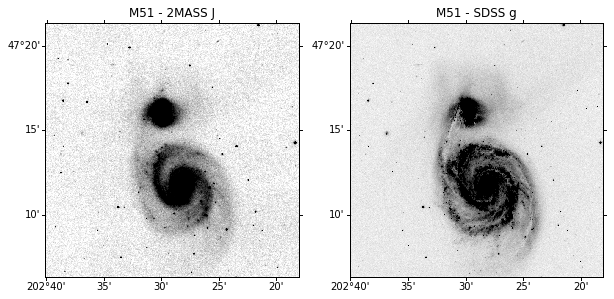

In [5]:
# get the data and the WCS
ima1=hdus1[0].data
ima2=hdus2[0].data
wcs1=WCS(hdus1[0].header)
wcs2=WCS(hdus2[0].header)

fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(121,projection=wcs1)
ax2=fig.add_subplot(122,projection=wcs1)
ax1.imshow(ima1,origin='lower',cmap=plt.cm.gray_r,vmin=136,vmax=145)
ax2.imshow(ima2,origin='lower',cmap=plt.cm.gray_r,vmin=-.05,vmax=.55)
ax1.set_title("M51 - 2MASS J")
ax2.set_title("M51 - SDSS g")

# Retrieve complete catalogs from Vizier

Let's consider this paper: [Melnick, J. (2017)](http://esoads.eso.org/abs/2017A%26A...599A..76M)

We discovered that Table 1 and Table 2 are [available on vizier](http://vizier.cfa.harvard.edu/viz-bin/VizieR?-source=J/A+A/599/A76)

The  Vizier code for the two tables is:
* 	J/A+A/599/A76/table1
* 	J/A+A/599/A76/table2


In [6]:
from astroquery.vizier import Vizier
v=Vizier()

# retrieve all sources
# remove the limit to the number of output objects
v.ROW_LIMIT = -1

id1="J/A+A/599/A76/table1"
id2="J/A+A/599/A76/table2"

result=v.get_catalogs([id1,id2])

result

TableList with 2 tables:
	'0:J/A+A/599/A76/table1' with 11 column(s) and 102 row(s) 
	'1:J/A+A/599/A76/table2' with 11 column(s) and 30 row(s) 

In [7]:
tab1,tab2=result
tab1

Name,z,sigma,e_sigma,logLHb,e_logLHb,EWHb,e_EWHb,SimbadName,_RA,_DE
,,km / s,km / s,[10-7W],[10-7W],0.1 nm,0.1 nm,,deg,deg
bytes12,float32,float32,float32,float32,float32,float32,float32,bytes24,float64,float64
J000657,0.0737,44.8,0.43,41.30,0.01,86.5,2.1,SDSS J000657.01+005126.0,1.73757,0.85722
J001647,0.0232,21.3,0.89,40.88,0.01,56.9,0.7,SDSS J001647.75-104742.2,4.19898,-10.79511
J002339,0.0531,30.5,0.62,41.32,0.01,110.1,1.3,SDSS J002339.61-094848.7,5.91504,-9.81353
J002425,0.0142,34.9,0.54,40.31,0.01,61.6,0.8,SDSS J002425.94+140410.3,6.10812,14.06954
J003218,0.0180,38.6,0.49,40.34,0.01,80.0,0.9,SDSS J003218.59+150014.2,8.07747,15.00396
J005147,0.0376,25.6,0.74,40.50,0.01,90.9,1.1,SDSS J005147.29+000940.0,12.94708,0.16111
J005602,0.0582,33.8,0.74,40.93,0.01,48.7,1.2,SDSS J005602.26-101009.7,14.00946,-10.16939
J013344,0.0193,17.1,1.10,39.87,0.02,66.4,1.8,SDSS J013344.62+005711.2,23.43596,0.95311


In [8]:
tab2

Name,z,sigma,e_sigma,logLHb,e_logLHb,EWHb,e_EWHb,SimbadName,_RA,_DE
,,km / s,km / s,[10-7W],[10-7W],0.1 nm,0.1 nm,,deg,deg
bytes12,float32,float32,float32,float32,float32,float32,float32,bytes19,float64,float64
UM382,0.0121,18.0,0.72,39.37,0.02,134.9,1.5,UM382,29.53912,-0.11034
UM396,0.0208,26.9,0.15,40.03,0.07,153.1,1.5,UM396,31.86000,2.94861
UM417,0.0087,14.8,0.17,38.72,0.07,46.5,1.5,UM417,34.87598,-0.98513
CTS1004,0.0473,43.1,0.06,40.75,0.02,77.3,1.5,CTS1004,47.17917,-40.40333
CTS1005,0.0744,43.4,0.10,41.34,0.02,133.7,1.5,CTS1005,59.78708,-39.10639
CTS1006,0.0207,33.8,0.04,40.76,0.02,69.8,1.5,CTS1006,70.54042,-45.42056
CTS1008,0.0611,44.3,0.38,41.35,0.03,139.6,1.5,CTS1008,72.91375,-31.88083
Tol0510-400,0.0413,30.9,0.43,40.75,0.03,64.0,1.5,Tol0510-400,77.98289,-39.99490


# Query a sky region from a Vizier catalog
`query_region()` is used to get data from a limited sky region from a catalog. You can use these keywords:

    position: a SkyCoord object to define the center of the region
    radius: The radius (with units) of the circular region to query.
    catalog: The catalog(s) which must be searched for this identifier. If not specified, all matching catalogs will be searched.
    
https://astroquery.readthedocs.io/en/latest/api/astroquery.vizier.VizierClass.html#astroquery.vizier.VizierClass.query_region

It is also possible to set filters on the individual columns. In some cases infact you may want to retrieve only data
that satisfy some condtions.
This is obtained by setting the keyword `column_filters` when the Vizier object is initialized. Details are given in the following example.


In the following example we will
* get a SDSS g-band image of the cluster of galaxies Abell 957
* get the list of galaxies in the WINGS survey from [Varela et al (2009)](http://esoads.eso.org/abs/2009A%26A...497..667V)
* get the list of galaxies in the OmegaWINGS survey from [Gullieuszik et al (2015)](http://esoads.eso.org/abs/2015A%26A...581A..41G)
* overplot the brightest galaxies on the SDSS image

The two calalogs (WINGS and OmegaWINGS) contain both galaxies and stars, we will retrieve only data for the brightest galaxies (V<20 mag).

Note that the OmegaWINGS survey was designed to study the outskirts of galaxy clusters; it does not have a complete coverage of the inner cluster regions

In [9]:

from astroquery.vizier import Vizier
from astroquery.skyview import SkyView
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import matplotlib.pyplot as plt


coo=SkyCoord.from_name("A957")

hdus=SkyView.get_images(position=coo,
                  survey=['SDSSg'],pixels=(1000,1000),
                          radius=10*u.arcmin
                         )[0]
ima=hdus[0].data
wcs=WCS(hdus[0].header)

# Gullieuszik et al (2015)
# Only galaxies brighter than V=20 mag
cat_id="J/A+A/581/A41/tablea2"
# Class=2 : galaxies
v=Vizier(catalog=cat_id,
        column_filters={'Class':"2","Vauto":"<20"}) 

# retrieve all sources
# remove the limit to the number of output objects
v.ROW_LIMIT = -1
# we query only 1 catalog, so we take the first element
# from the list that is returned 
tab1 = v.query_region(coo, radius=5*u.arcmin,catalog=cat_id)[0] 


# Varela et al (209)
cat_id="J/A+A/497/667/wings"
# We want nnly galaxies brighter than V=20 mag
# Cl="G" : galaxies
# we therefore apply a filter to the 
# Cl and Vauto (the magnitude) columns
v=Vizier(catalog=cat_id,
        column_filters={'Cl':"G","Vauto":"<20"}) 

# retrieve all sources
# remove the limit to the number of output objects
v.ROW_LIMIT = -1
tab2 = v.query_region(coo, radius=5*u.arcmin,catalog=cat_id)[0]

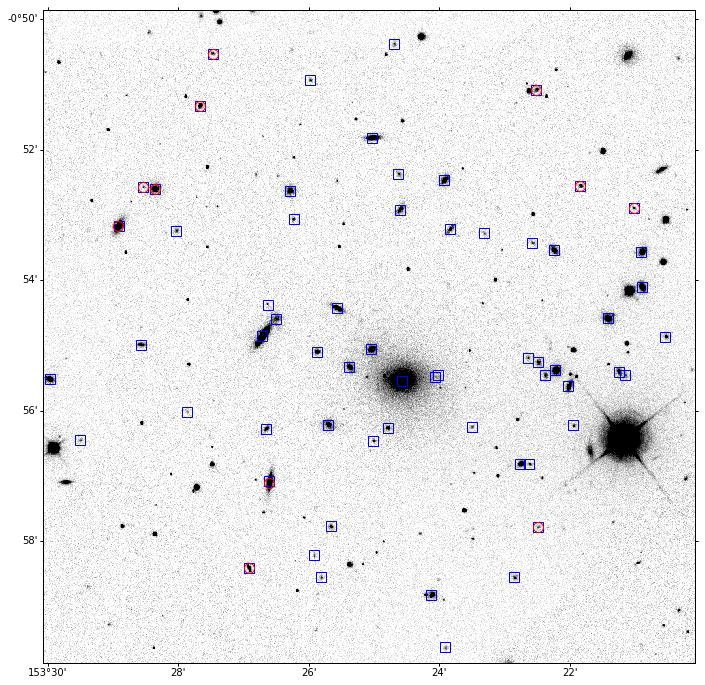

In [10]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(111,projection=wcs)
ax.imshow(ima,origin="lower",vmin=0,vmax=.2,cmap=plt.cm.gray_r)

ax.plot(tab2["RAJ2000"],tab2["DEJ2000"],'s',
        transform=ax.get_transform('world'),  # use the transformation defined by the projection
        ms=10,mec='b',mfc='none')

ax.plot(tab1["RAJ2000"],tab1["DEJ2000"],'o',
        transform=ax.get_transform('world'),  # use the transformation defined by the projection
        ms=10,mec='r',mfc='none');
